In [21]:
import requests
import pandas as pd

In [28]:
import dotenv

geocode_apikey = dotenv.get_variable('.env', 'GEOCODE_API')

# Location

We begin by finding the latitude and longitude of a location

In [23]:
location = "London"

In [29]:
url = f"https://geocode.maps.co/search?q={location}&api_key={geocode_apikey}"

payload = {}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

data = response.json()
lat = data[0]['lat']
lon = data[0]['lon']

print(f"Latitude: {lat}, Longitude: {lon}")

Latitude: 51.5074456, Longitude: -0.1277653
[{'place_id': 248600976, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 65606, 'boundingbox': ['51.2867601', '51.6918741', '-0.5103751', '0.3340155'], 'lat': '51.5074456', 'lon': '-0.1277653', 'display_name': 'London, Greater London, England, United Kingdom', 'class': 'place', 'type': 'city', 'importance': 0.9407827616237295}, {'place_id': 248493076, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 51800, 'boundingbox': ['51.5068709', '51.5233122', '-0.1138295', '-0.0727619'], 'lat': '51.5156177', 'lon': '-0.0919983', 'display_name': 'City of London, Greater London, England, United Kingdom', 'class': 'boundary', 'type': 'administrative', 'importance': 0.6865111547516773}, {'place_id': 328662194, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm

# Get the weather data

We are going to use the OpenWeatherMap API to get the weather data for the location we have just geocoded.

In [25]:
url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current=temperature_2m&hourly=temperature_2m"
payload = {}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

temps = response.json()['hourly']['temperature_2m']
times = response.json()['hourly']['time']
print (times, temps)

['2024-04-11T00:00', '2024-04-11T01:00', '2024-04-11T02:00', '2024-04-11T03:00', '2024-04-11T04:00', '2024-04-11T05:00', '2024-04-11T06:00', '2024-04-11T07:00', '2024-04-11T08:00', '2024-04-11T09:00', '2024-04-11T10:00', '2024-04-11T11:00', '2024-04-11T12:00', '2024-04-11T13:00', '2024-04-11T14:00', '2024-04-11T15:00', '2024-04-11T16:00', '2024-04-11T17:00', '2024-04-11T18:00', '2024-04-11T19:00', '2024-04-11T20:00', '2024-04-11T21:00', '2024-04-11T22:00', '2024-04-11T23:00', '2024-04-12T00:00', '2024-04-12T01:00', '2024-04-12T02:00', '2024-04-12T03:00', '2024-04-12T04:00', '2024-04-12T05:00', '2024-04-12T06:00', '2024-04-12T07:00', '2024-04-12T08:00', '2024-04-12T09:00', '2024-04-12T10:00', '2024-04-12T11:00', '2024-04-12T12:00', '2024-04-12T13:00', '2024-04-12T14:00', '2024-04-12T15:00', '2024-04-12T16:00', '2024-04-12T17:00', '2024-04-12T18:00', '2024-04-12T19:00', '2024-04-12T20:00', '2024-04-12T21:00', '2024-04-12T22:00', '2024-04-12T23:00', '2024-04-13T00:00', '2024-04-13T01:00',

We then use the weather data to create a simple weather report.

In [32]:
df = pd.DataFrame({'time': times, 'temp': temps})

df['time'] = pd.to_datetime(df['time'])

df.set_index('time', inplace=True)

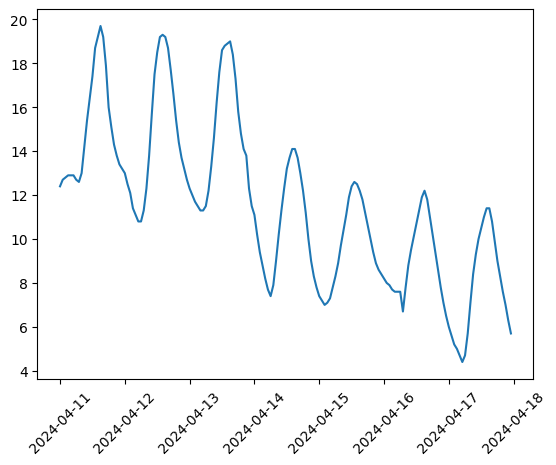

In [31]:
import matplotlib.pyplot as plt

plt.xticks(rotation=45)

plt.plot(df['temp'])